# Ingresos individuales y familiares no estacionarios de clases pobres, ricas y medias en México

En este trabajo se exponen los puntos principales de [este artículo](http://dx.doi.org/10.1016/j.physa.2016.08.042), donde se pretende investigar una economía emergente que sea menos estable que las economías desarrolladas, sobre todo en tiempos de crisis, como lo fue la economía mexicana cuando se produjo una fuerte depreciación de la moneda a finales de 1994, seguida de una grave recesión económica. En el artículo se analiza la información estadística sobre la distribución de ingreso de la población en México para el período 1992 - 2008.

## 1 Introducción

La desigualdad en sistemas sociales ha sido un fenómeno universal y robusto, no limitado ni por el tiempo ni por la geografía. Tiene unas cuantas regularidades estadísticas, como es el caso de las distribuciones de riqueza e ingreso en un amplio rango de sociedades y períodos temporales.

En general, se cree que la parte superior (los más ricos) de las distribuciones de ingreso y riqueza está descrita por una ley de potencia (**distribución de Pareto**).

[Los análisis de datos de la distribución de ingreso en los EEUU](https://iopscience.iop.org/article/10.1209/epl/i2004-10330-3) revelan la coexistencia de dos clases sociales:

* Clase baja
  * Es la más grande de las dos clases
  * Está caracterizada por la **distribución B-G**, la cual es muy estable en el tiempo para todos los años
* Clase alta
  * Es muy pequeña
  * Exhibe la distribución de Pareto, la cual es muy volátil

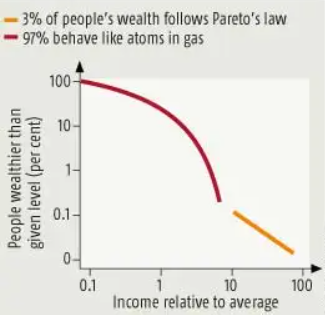

Figura: Función de distribución acumulativa complementaria (CCDF) de ingreso en los EEUU.

Los autores afirman que la conservación local de dinero da lugar a una distribución B-G robusta en la gran clase baja de los EEUU. <font color="red">Aunque esta conservación es solo una aproximación</font>, la analogía B-G trabaja muy bien en la región de bajos ingresos, ya que todas las distribuciones anuales colapsan en una sola curva después de ser ajustadas a la inflación.

Los autores de [este libro](https://books.google.com.mx/books?hl=es&lr=&id=LWAgAwAAQBAJ&oi=fnd&pg=PR7&ots=ICnTju-PGM&sig=_x2mx39oB1boC26k5mKXBqTPW5M&redir_esc=y#v=onepage&q&f=false) extendieron el modelo utilizado en el trabajo anterior para imponer restricciones en las reglas de intercambio que tomen en cuenta los ahorros de los agentes. Dentro de este contexto, la **distribución Gamma** es un buen ajuste para un ABM con un factor constante de ahorro fraccionario. Tal extensión de modelo recibe el nombre de **modelo CC** en la literatura de modelos RAE. La distribución Gamma también aparece en [un modelo de maximización de utilidad](https://doi.org/10.1016/j.physa.2009.06.038) como parte de un modelo de intercambio estándar que emplea la función de utilidad de Cobb-Douglas.

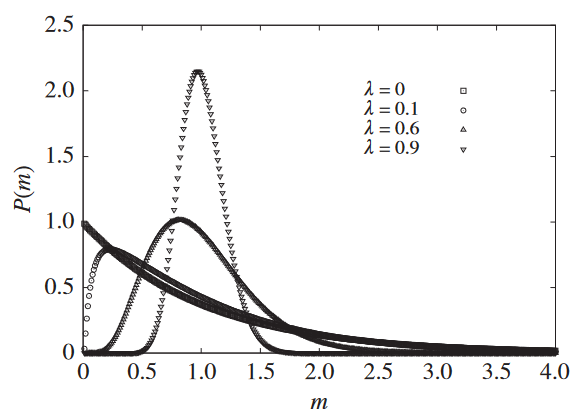

Figura: distribución estacionaria para el modelo CC, con ahorro uniforme $\lambda$

En general, como se menciona en [este libro](https://books.google.com.mx/books?hl=es&lr=&id=LWAgAwAAQBAJ&oi=fnd&pg=PR7&ots=ICnTju-PGM&sig=_x2mx39oB1boC26k5mKXBqTPW5M&redir_esc=y#v=onepage&q&f=false), la mayor parte del rango bajo de la distribución -tanto de ingreso como de riqueza- en muchas sociedades parece estar bien ajustada tanto por la distribución Gamma como por la **distribución log-normal**. En ambas distribuciones, el término exponencial domina para valores grandes de dinero.

[Un importante estudio reciente](https://link.springer.com/article/10.1140/epjb/e2014-50501-x) sobre la distribución de ingreso en los EEUU afirma que el ajuste de las mezclas B-G y Pareto se puede mejorar aun más agregando un componente log-normal.

## 2 Distribuciones de Pareto y de tipo exponencial (log-normal y Gamma)

La distribución empírica de ingreso en paises tales como EEUU, la Unión Europea, RU y Canadá, entre otros, presentan una estructura de dos clases (clase baja y clase alta). Se pueden encontrar resultados similares en subgrupos de EEUU categorizados por género y raza. En todos estos casos, la cola superior de Pareto cambia en el tiempo mucho más que en las regiones de más bajo ingreso. <font color="blue">La creación y destrucción de dinero en procesos complejos (a través de inversiones, crédito, derivados financieros, grandes crisis en el mercado de valores, etc.) están mucho más claramente relacionados con la cola de Pareto</font>.

Un caso particular de lo anterior dicho lo tenemos en [el análisis de datos de la distribución de ingreso en los EEUU](https://iopscience.iop.org/article/10.1209/epl/i2004-10330-3) en el período 1983 - 2001. Ya que la distribución exponencial B-G de la clase baja se mostró muy estable en el tiempo, mientras que la distribución de ley de potencia de la clase alta se mostró altamente dinámica y volátil, los autores concluyeron que <font color="blue">la clase baja se encuentra en equilibrio térmico, mientras que la clase alta se encuentra fuera de este</font>.

De la evolución temporal de la riqueza integrada de las personas en la cola de Pareto se observó que dicha riqueza se encontraba más o menos en fase con el índice bursátil S&P500 dividido por la inflación. Es decir, la cola de Pareto se correlaciona con el ascenso y la caída del mercado de valores. <font color="blue">Este hecho empírico muestra que algunos de los mecanismos que la gente más rica sigue para hacer dinero son diferentes a los de la mayoría de la población, quienes en su mayoría intercambian bienes y servicios</font>.

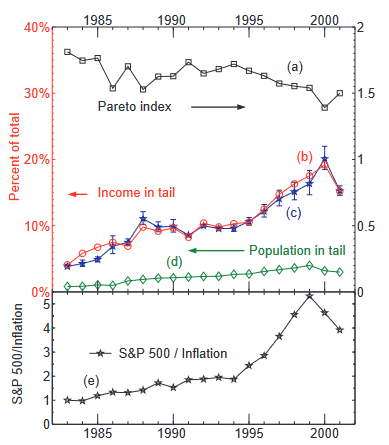

Figura: (a) El índice de Pareto $\alpha$ de la cola de la ley de potencia $P\left( m \right) \propto m^{-\alpha}$. (b) El ingreso excesivo en la cola de Pareto, como una fracción $f$ del ingreso total en el sistema, obtenido como la diferencia entre el ingreso total y el ingreso en la parte exponencial de la distribución. (c) La fracción de ingreso de cola, obtenida al integrar la ley de potencia de Pareto de la cola. (d) La fracción de población perteneciente a la cola de Pareto. (e) El índice bursátil S&P 500 dividido por el coeficiente de inflación y normalizado a 1 en 1983.

### 2.1 Distribuciones de ley de potencia o de Pareto 

Hace más de un siglo, el economista Vilfredo Pareto encontró que la distribución de riqueza sigue una cola de ley de potencia para los sectores más ricos de la sociedad,

$$
P\left( m \right) \propto m^{-\alpha}
$$

donde $\alpha$ es el **parámetro de escala** o **índice de Pareto**, el cual se ha encontrado que varía entre los valores 2 y 3 para diferentes economías.

En la práctica, pocos fenómenos empíricos obedecen a leyes de potencia para todos los valores de $m$. Es más común que, en muchas distribuciones para diferentes campos de conocimiento, la ley de potencia aplique solamente para valores mayores que algunos valores críticos. Es decir, ciertos sistemas complejos desarrollan distribuciones de ley de potencia en ciertos puntos críticos o **transiciones de fase** de su espacio de parámetros, debido a la divergencia de alguna escala característica. Un mecanismo para generar leyes de potencia es el de [**fenómenos críticos**](https://doi.org/10.1080/00107510500052444), en los cuales es posible que algunos sistemas dinámicos se organicen a sí mismos de tal manera que siempre lleguen a los puntos críticos, [independientemente del estado inicial](https://doi.org/10.1103/PhysRevLett.59.381).

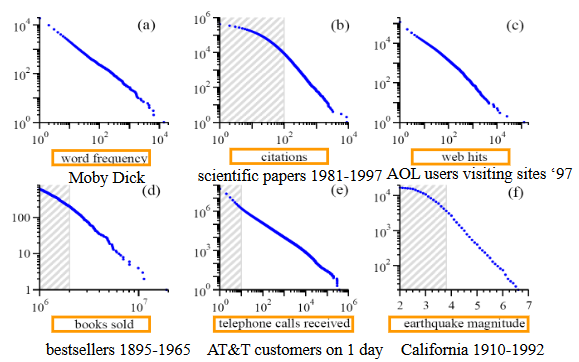

Figura: varios ejemplos de distribuciones empíricas de tipo acumulativa complementaria donde se tiene una cola de Pareto.

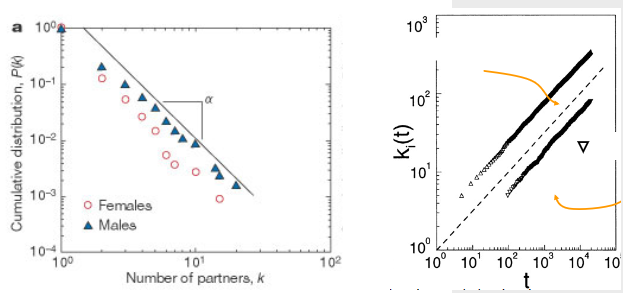

Figura: Las redes del mundo real a menudo muestran leyes de potencia. Izquierda: distribución de tipo acumulativa complementaria de compañeros sexuales en una red de contactos sexuales humanos. Tomado de [este artículo](https://pubmed.ncbi.nlm.nih.gov/11418846/). Derecha: evolución temporal de la conectividad de un vértice en el modelo Barabasi-Albert. Tomado de [este artículo](10.1126/science.286.5439.509).

---
Nota: el **modelo de Barabasi-Albert** es un modelo de red no dirigida donde cada nodo se conecta a los demás con una probabilidad proporcional a su grado. El proceso de construcción comienza con algún subgrafo inicial, donde cada nodo cuenta con $m$ vértices. Las propiedades de la red resultante son las siguientes:

* **La distribución es libre de escala** con exponente $\alpha = 3$, $P\left( k \right) = 2m^{2}/k^{3}$.
* **La red está conectada**. Cada vértice nace con un vínculo ($m= 1$) o varios vínculos ($m > 1$) y se conecta a vértices más antiguos, que forman parte del componente gigante.
* **Los vértices más antiguos son los más "ricos"**. Los nodos acumulan vínculos a medida que pasa el tiempo, y el vínculo preferencial del modelo preferirá a los nodos con más grado o nodos más "ricos", que tienden a ser más antiguos y tuvieron una ventaja inicial.

---

### 2.2 Distribución log-normal

En 1931, [Robert Gibrat aclaró](https://books.google.com.mx/books/about/Les_in%C3%A9galit%C3%A9s_%C3%A9conomiques.html?id=m9fuoAEACAAJ&redir_esc=y) que la ley de Pareto es válida sólo para el rango de ingresos altos, mientras que para los rangos de ingresos bajos y medios sugirió que la distribución del ingreso se describe mediante una densidad de probabilidad log-normal y propuso una ley de efecto proporcional, que establece que un pequeño cambio en una cantidad es independiente de la cantidad misma. Por lo tanto, la distribución de una cantidad $dz = dm/m$ debe ser gaussiana, lo que da como resultado la ley de Gibrat:

$$
P\left( m \right) \propto \frac{1}{\sqrt{2 \pi \sigma^{2}}}\exp\left( -\frac{\log^{2}\left( m/m_0 \right)}{2\sigma^2} \right)
$$

El factor $\beta = 1/\sqrt{2\sigma^2}$, también conocido como el **índice de Gibrat**, mide la igualdad de la distribución, y [empíricamente se sabe que cae entre 2 y 3](https://books.google.com.mx/books?hl=es&lr=&id=LWAgAwAAQBAJ&oi=fnd&pg=PR7&ots=ICnTju-PGM&sig=_x2mx39oB1boC26k5mKXBqTPW5M&redir_esc=y#v=onepage&q&f=false).

### 2.3 Distribución Gamma

El argumento principal a favor de los modelos de intercambio cinético, es que <font color="blue">los millones de pequeñas transacciones que toman lugar en un período muy corto de tiempo pueden generar las características estocásticas esenciales de los modelos de intercambio cinético y sus correspondientes distribuciones</font>. <font color="red">Sin embargo, una objeción la encontramos en [este artículo](10.1016/j.physa.2006.04.029), donde se anota que "en las economías capitalistas industrializadas, el dinero definitivamente no se conserva", lo cual es cierto</font>. Aun así, el crecimiento de ingreso y riqueza en una economía se puede estudiar como un fenómeno de serie temporal con datos tomados en una sola instancia o dentro de un período de tiempo muy corto para obtener promedios estadísticos durante períodos de tiempo más largos. [La propuesta de Dragulescu y Yakovenko](https://doi.org/10.1016/S0378-4371(01)00298-9) de estudiar un sistema económico conservativo tiene la ventaja de que <font color="blue">la distribución B-G resultante es muy robusta ante perturbaciones, debido a que dicha distribución es la que maximiza la "entropía económica"</font>.

---
Nota: en [este artículo](10.1016/j.physa.2006.04.029) denominado "Worrying trends in econophysics", los autores hacen notar su preocupación respecto a ciertas tendencias que la literatura en econofísica había presentado hasta el año 2006, las cuales son:

1) La falta de conocimiento de los trabajos que se han realizado en el ámbito de la economía.
2) La resistencia a una metodología estadística más rigurosa y sólida.
3) La creencia de que se pueden encontrar regularidades empíricas universales en muchas áreas de la actividad económica.
4) Los modelos teóricos que están siendo usados para explicar los fenómenos empíricos -dichos modelos se basan en modelos de física estadística en los que la energía se conserva en los procesos de intercambio, aun cuando en las economías capitalistas industrializadas el dinero definitivamente no se conserva.

---

Sin embargo, los ahorros aparecen de manera natural en cualquier intercambio. En el modelo CC, los autores [Chakraborti y Chakrabarti](https://books.google.com.mx/books?hl=es&lr=&id=LWAgAwAAQBAJ&oi=fnd&pg=PR7&ots=ICnTju-PGM&sig=_x2mx39oB1boC26k5mKXBqTPW5M&redir_esc=y#v=onepage&q&f=false) introducen un factor de propensión al ahorro $\lambda$ en el modelo de intercambio aleatorio, en donde cada comerciante ahorra una fracción $\lambda$ de su dinero, e intercambia una fracción aleatoria $\epsilon$ del resto con el otro comerciante,

$$
m_i \longrightarrow m'_i = \lambda m_{i} + \epsilon \left( 1-\lambda \right)\left( m_i + m_j \right) \\
m_j \longrightarrow m'_j = \lambda m_{j} + \left( 1-\epsilon \right) \left( 1-\lambda \right)\left( m_i + m_j \right)
$$

donde
$$
\Delta m = m_i - m'_i = \left( 1-\lambda \right)\left[ m_i - \epsilon \left( m_i+m_j \right) \right]
$$

Aunque no existe una expresión analítica para la distribución en el caso de una constante fija $\lambda$, se ha utilizado una distribución gamma como una buena aproximación de la distribución resultante,

$$
f_{n}\left( m \right) = a_{n}m^{n-1}\exp\left( -\frac{n m}{\left\langle m \right\rangle} \right)\\
$$
$$
\textrm{con}\quad a_{n} = \frac{1}{\Gamma\left( n \right)}\left( \frac{n}{\left\langle m \right\rangle} \right)^{n}
$$

donde $n$ se define como

$$
n\left( \lambda \right) = 1 + \frac{3\lambda}{1-\lambda}
$$

La distribución B-G es el caso especial para $\lambda = 0$, es decir, el caso sin ahorros (colisiones elásticas).

#### 2.3.1 Simulación

A continuación mostramos los resultados de una simulación según el modelo CC. Los parámetros son: $\lambda = 1/4$, $N = 5 \times 10^{5}$ y $M = 5 \times 10^{6}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = T = \frac{M}{N} = 10$.

In [1]:
from economic_agent import Agent_03
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from math import gamma

In [4]:
# Parámetros
Nexp = 5
N = int(5*10**Nexp) # número de agentes

Mexp = 6
M = 5*10**Mexp # cantidad total de dinero en el sistema

T = M/N # temperatura de dinero

exchange_rule = 'with_savings'
lbda = 1/3 # fracción de ahorro

texp = 6 # Se recomienda 5
t_steps = int(4*10**texp) # Pasos de tiempo para la simulación

In [5]:
# Se crean a los agentes
agents_list = [Agent_03(money=T, lbda=lbda) for i in range(N)] # Todos los agentes tienen la misma cantidad de dinero
# Simulación
for i in range(t_steps):
    agent_i_index = randint(0,N-1)
    agent_j_index = randint(0,N-1) # se elige un par de agentes al azar para hacer transacción
    coin_flip = randint(0,1)
    loser_index = [agent_i_index,agent_j_index][coin_flip] # Uno de los agentes se selecciona al azar como el perdedor
    winner_index = [agent_i_index, agent_j_index][1-coin_flip]
    # El perdedor le paga al ganador
    agents_list[loser_index].pay(payee=agents_list[winner_index])

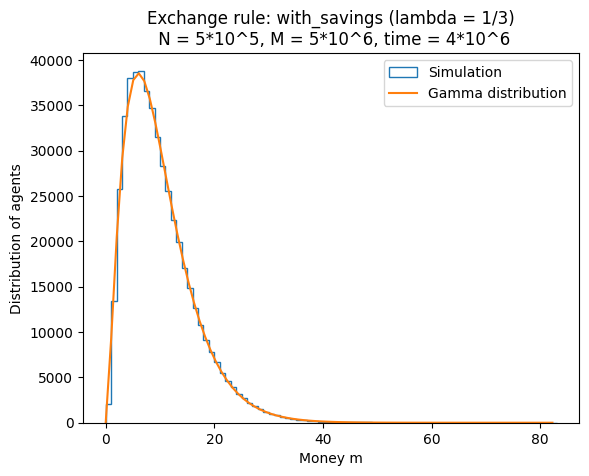

In [10]:
# Datos para el histograma
final_m_array = np.array([agent.money for agent in agents_list])
nb_bins = int(max(final_m_array))

# Distribución Gamma
m_values = np.linspace(0,max(final_m_array),nb_bins)
n = 1 + (3*lbda)/(1-lbda)
an = (1/gamma(n))*(n/T)**n
P_values = N*an*(m_values**(n-1))*np.exp(-n*m_values/T)

plt.hist(final_m_array, bins=range(nb_bins+2), label="Simulation", histtype='step')
plt.plot(m_values, P_values, label="Gamma distribution")
plt.title(f"Exchange rule: {exchange_rule} (lambda = 1/3)\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.xlabel("Money m")
plt.ylabel("Distribution of agents")
#plt.yscale('log')
plt.legend()
plt.show()

## 3 Ajuste de la distribución del ingreso en México

En México, el Instituto Nacional de Estadística y Geografía (INEGI) presenta periódicamente resultados de la [Encuesta Nacional de Ingresos y Gastos de los Hogares](https://www.inegi.org.mx/programas/enigh/tradicional/1994/#documentacion). La fuente de datos con la que se trabajó es el ingreso corriente per cápita trimestral obtenido de la Encuesta Nacional de Ingresos y Gastos (ENIGH) que levanta el INEGI de manera bienal. El presente estudio se realizó durante los años 1992, 1994, 1996, 1998, 2000, 2002, 2004 y 2005, 2006 y 2008.

### 3.0 Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) 2004


En 2004 la ENIGH se realizó para atender las demandas de información sobre la distribución del ingreso y el gasto de los hogares, planteadas por diversos usuarios para construir algunos indicadores básicos en la instrumentación de la política económica y social y en las investigaciones sobre los niveles de vida de la población.

* **Objetivo general**: Generar estadística sobre el monto, estructura y distribución de los ingresos y gastos de los hogares.
* **Periodicidad**: A partir de 1992 se realiza con una periodicidad bienal con excepción de 2005, ya que fue un levantamiento extraordinario.
* **Población objetivo**: Hogares, de nacionales o extranjeros, que residen habitualmente en viviendas particulares dentro del territorio nacional.
* **Cobertura temática**
  * Características sociodemográficas de los miembros del hogar.
  * Condición de actividad y características ocupacionales de los miembros del hogar de 12 años y más.
  * Características de infraestructura de la vivienda.
  * Ingreso corriente total monetario y no monetario de los hogares.
  * Perceptores del hogar y su ingreso corriente monetario.
  * Gasto corriente total monetario y no monetario de los hogares.
  * Percepciones financieras y de capital total, monetarios y no monetarios de los hogares.
  * Erogaciones financieras y de capital total, monetarios y no monetarios de los hogares.
  * Ingreso total de los hogares.
  * Gasto total de los hogares.
* **Cobertura geográfica**: Nacional. Distrito Federal y Nuevo León, entidades federativas que, en su momento, convinieron con el INEGI una ampliación de muestra.
* **Desglose geográfico** 
  * Área urbana (localidades de 2 mil 500 y más habitantes). 
  * Área rural (localidades menores de 2 mil 500 habitantes).
* **Diseño estadístico**
  * Tamaño de la muestra: 25,115 viviendas.
  * Unidad de observación: el hogar.
  * Unidad de muestreo: la vivienda.
  * Unidad de análisis: el hogar, la vivienda y los integrantes del hogar.
  * Marco muestral utilizado: El marco de muestreo empleado es el Marco Nacional de Viviendas 2002 del INEGI, construido a partir de la información cartográfica y demográfica que se obtuvo del XII Censo General de Población y Vivienda 2000. Las viviendas se eligen mediante un minucioso proceso estadístico (incluye las viviendas deshabitadas y de uso temporal) que garantiza que los resultados obtenidos a partir de sólo una parte de la población (muestra), se pueda generalizar hacia el total. La selección se realiza en dos etapas:
    * En la primera etapa, se eligen las unidades primarias de muestreo (UPM).
    * En la segunda etapa, se seleccionan las viviendas objeto de entrevista de cada encuesta.
  * Esquema de muestreo: El diseño de la muestra para la ENIGH-2004 se caracteriza por ser probabilístico. En consecuencia, los resultados obtenidos de la encuesta se generalizan a toda la población. A la vez, el diseño es bietápico, estratificado y por conglomerados, donde la unidad última de selección es la vivienda y la unidad de observación es el hogar.
* **Período de levantamiento**: El operativo de campo de la encuesta se lleva a cabo del 20 de agosto al 24 de noviembre de 2004. Este periodo se divide en diez decenas, en cada una de ellas la información se recolecta durante siete días consecutivos.

#### Cuestionarios

Para la captación de la información se utilizan dos instrumentos estructurados:

1) El cuestionario básico, en donde se registran los datos referentes a las características de la vivienda, residentes e identificación de hogares, características sociodemográficas y para los integrantes del hogar de 12 y más años se capta información de la condición de actividad y las características ocupacionales, así como sus ingresos y sus gastos.

2) El cuadernillo de gastos diarios (en alimentos, bebidas, tabaco y transporte público), en el que se capta información de los gastos realizados dentro y fuera del hogar.

#### Recolección de datos

Para el levantamiento de la información se manejan distintos periodos de referencia:

• Cuestionario básico:

- Características sociodemográficas y de la vivienda, así como para equipamiento del hogar, el periodo de referencia es el momento en que se realiza la entrevista.
- Condición de actividad y características del trabajo principal y secundario, se hace referencia al mes anterior al que se realiza la entrevista, en tanto que para los trabajos diferentes a los realizados el mes pasado, el periodo de referencia son los seis meses anteriores.
- Gasto mensual, gasto trimestral y gasto semestral, hacen de referencia al mes pasado, a los tres meses y a los seis meses anteriores al que se realiza la entrevista, respectivamente.
- Ingresos de los integrantes del hogar.
- Ingresos de los negocios o empresas del hogar y cooperativas industrial, comercial y de servicios (no agropecuarios), el periodo de referencia son los seis meses anteriores al periodo del levantamiento.
- Ingresos de los negocios agrícolas, el periodo de referencia es de octubre de 2005 y el día de la entrevista, cubriendo ambos ciclos agrícolas, a saber el Otoño-Invierno y el Primavera-Verano.
- Ingresos de los negocios de cría, explotación y productos derivados de animales hace referencia a los 12 meses anteriores al mes de la entrevista.

• Cuadernillo de gastos diarios en alimentos, bebidas y tabaco y transporte público:

- El periodo de referencia son los siete días que dura el levantamiento, y en la hoja de balance hace referencia al mes anterior al mes de la entrevista.

### 3.1 Estimación del parámetro de demarcación de clase baja-alta y del exponente de Pareto

Para determinar el valor mínimo del ingreso a partir del cual existe un comportamiento de ley de potencia, el exponente de Pareto y la “prueba de bondad de ajuste” por distribución de ley de potencia, [se utilizó un código de programación](https://aaronclauset.github.io/powerlaws/).

[La idea fundamental detrás del método](https://arxiv.org/abs/0706.1062) es simple y consiste en elegir el valor de $m_{min}$ que haga que las distribuciones de probabilidad de los datos medidos y el modelo de ley de potencia de mejor ajuste sean lo más similares posible por encima de este valor. Hay una variedad de medidas para cuantificar la distancia entre dos distribuciones de probabilidad, pero para datos no normales la más común y, por lo tanto, la que se utiliza en el código, es [la estadística de Kolmogorov-Smirnov o KS](https://arxiv.org/abs/cond-mat/0412004), que es simplemente la distancia máxima entre las funciones de distribución acumulativa (CDF) de los datos y el modelo ajustado:

$$
D = \textrm{max} \left| O\left( x \right) - P\left( x \right) \right|
$$

donde $O\left( x \right)$ es la CDF de los datos para las observaciones con valor de al menos $m_{min}$, y $P\left( x \right)$ es la CDF para el modelo de ley de potencia que mejor se ajusta a los datos en la región. El programa deriva los estimadores de máxima verosimilitud (MLE) del parámetro de escalamiento tanto para los casos discretos como continuos. Los detalles de las derivaciones se dan en el Apéndice B de [esta referencia](https://arxiv.org/abs/cond-mat/0412004). El MLE para el caso continuo es:

$$
\alpha = 1 + n \left[ \sum_{i=1}^{n}\ln \frac{m_i}{m_{min}} \right]^{-1}
$$

donde $\left\{ m_{i} \right\}_{i=1}^{n} $ son los valores observados de $m$ tales que $m_{i} \ge m_{min}$.

### 3.2 Distribuciones de ingresos acumulados de los hogares